In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('./imdb_top_1000.csv', thousands=',')

In [3]:
movies['Runtime'] = [i.split()[0] for i in movies['Runtime']]
movies['Runtime'] = movies['Runtime'].astype(int)
movies = movies[movies.Released_Year.str.isnumeric()]
movies['Released_Year'] = movies['Released_Year'].astype(int)

In [4]:
# Splitst de genre's op in nieuwe rijen
# Gebruik enkel voor tellen van genre's
moviesExplodeGenre = movies.assign(Genre = movies.Genre.str.split(", ")).explode('Genre')

In [5]:
# Splitst de genre's op in nieuwe kolommen
# Gebruik wanneer exploden rommelt met gegevens
movies[['Genre1', 'Genre2', 'Genre3']] = movies['Genre'].str.split(', ', 2, expand=True)

In [7]:
movies.corr()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165807,-0.131053,-0.339272,0.241785,0.233250
Runtime,0.165807,1.000000,0.244112,-0.031399,0.173304,0.139104
IMDB_Rating,-0.131053,0.244112,1.000000,0.268641,0.495361,0.097490
Meta_score,-0.339272,-0.031399,0.268641,1.000000,-0.018519,-0.030560
No_of_Votes,0.241785,0.173304,0.495361,-0.018519,1.000000,0.574877
Gross,0.233250,0.139104,0.097490,-0.030560,0.574877,1.000000


Hieruit blijk dat de sterkste correlatie ligt tussen 'Gross' en 'No_of_Votes'. Dit is logisch aangezien een film die veel bekeken wordt veel zal opleveren en ook veel reviews zal krijgen.

<AxesSubplot:xlabel='Gross', ylabel='No_of_Votes'>

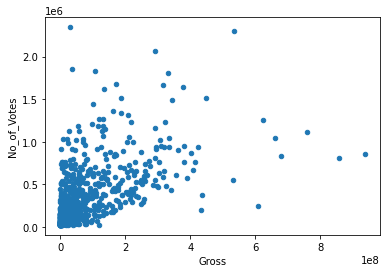

In [8]:
movies.plot(kind='scatter', x='Gross', y='No_of_Votes')

Ik had niet verwacht dat de film met de hoogste gross en redelijk lage no_of_votes zou hebben. Zo vind ik het ook apart de de film met de hoogste no_of_votes en lage gross heeft.